# **TTI109 - Estatística**
# **Aula Complementar - Titanic**

Nessa aula vamos usar o conjunto de dados `titanic_train.csv` para treinar os conceitos de estatística descritiva. O arquivo de dados está disponível na pasta "Aula Complementar - Titanic" na seção "Aulas" da página de TTI109 no OPEN LMS.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação dos dados no formato Pandas DataFrame

Mounted at /content/drive


In [2]:
titanic = pd.read_csv('titanic_train.csv')

## Análise exploratória

* Qual a dimensão dos conjunto de dados?
* Quais as colunas estão disponíveis para análise? Quais são os tipos de dados?
* Quais colunas são numéricas? Quais são categóricas ou cadastrais?
* Existem dados faltantes? Quantos? Em quais colunas? Em caso afirmativo, como proceder?

In [3]:
# Dimensão dos dados
dim = titanic.shape
print(f'Dimensão do conjunto de dados = {dim}')

Dimensão do conjunto de dados = (891, 12)


In [3]:
# Colunas disponíveis
col = titanic.columns
print(f'Colunas disponíveis: \n{col}')

Colunas disponíveis: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# Tipos de dados
tipos_de_dados = titanic.dtypes
print(f'Tipos de dados: \n{tipos_de_dados}')

Tipos de dados: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Colunas numéricas
col_numericas = titanic.select_dtypes(include=['int64', 'float64']).columns
print(f'Colunas numéricas: \n{col_numericas}')

Colunas numéricas: 
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [7]:
# Colunas categóricas ou cadastrais
col_categoricas = titanic.select_dtypes(include=['object']).columns
print(f'Colunas categóricas ou cadastrais: \n{col_categoricas}')

Colunas categóricas ou cadastrais: 
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [8]:
# Dados faltantes
dados_faltantes = titanic.isnull().sum()
print(f'Dados faltantes: \n{dados_faltantes}')

Dados faltantes: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Quantidade de valores faltantes nas colunas 'Age', 'Cabin' e 'Embarked'
valores_faltantes_age = titanic['Age'].isnull().sum()
valores_faltantes_cabin = titanic['Cabin'].isnull().sum()
valores_faltantes_embarked = titanic['Embarked'].isnull().sum()

print(f'Valores faltantes em Age: {valores_faltantes_age}')
print(f'Valores faltantes em Cabin: {valores_faltantes_cabin}')
print(f'Valores faltantes em Embarked: {valores_faltantes_embarked}')


Valores faltantes em Age: 177
Valores faltantes em Cabin: 687
Valores faltantes em Embarked: 2


A coluna `'Age'` é de nosso interesse na análise e descrição dos dados. É preciso preencher os dados faltantes com alguma informação relevante à distribuição das idades.

Aqui, vamos adotar a seguinte estratégia:

* Agrupar os passageiros por classe (`'Pclass'`), sobrevivência ao naufrágio (`'Survived'`) e por gênero (`'Sex'`);
* Calcular a média das idades de cada agrupamento;
* Substituir os valores faltantes pela média do agrupamento a que pertence o indivíduo cuja idade não está registrada.

In [11]:
# Definindo os critérios de agrupamento (exemplo: usando 'Pclass')
grupos = 'Pclass'

# Preenchendo os valores faltantes na coluna 'Age_Fill' com as médias dos grupos definidos
titanic['Age_Fill'] = titanic.groupby(grupos)['Age'].transform(lambda x: x.fillna(x.mean()))

# Verificando as médias dos grupos
medias_por_grupo = titanic.groupby(grupos)['Age'].mean()
print(medias_por_grupo)



Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [13]:
# Definindo os critérios de agrupamento (exemplo: usando 'Pclass')
grupos = 'Pclass'

# Preenchendo os valores faltantes na coluna 'Age_Fill' com as médias dos grupos definidos
titanic['Age_Fill'] = titanic.groupby(grupos)['Age'].transform(lambda x: x.fillna(x.mean()))

# O passageiro registrado na linha 176 é um homem que embarcou na 3a classe
# e não sobreviveu. Sua idade não está registrada ('Age' = NaN)
# Note que a idade presente na coluna 'Age_Fill' condiz com o agrupamento ao qual pertence o referido passageiro
display(titanic.iloc[176])

PassengerId                              177
Survived                                   0
Pclass                                     3
Name           Lefebre, Master. Henry Forbes
Sex                                     male
Age                                      NaN
SibSp                                      3
Parch                                      1
Ticket                                  4133
Fare                                 25.4667
Cabin                                    NaN
Embarked                                   S
Age_Fill                            25.14062
Name: 176, dtype: object

## Descrição dos dados

Construa gráficos / diagramas que descrevam de forma adequada:

**a)** A distribuição do gênero dos passageiros.

Sex
male      577
female    314
Name: count, dtype: int64


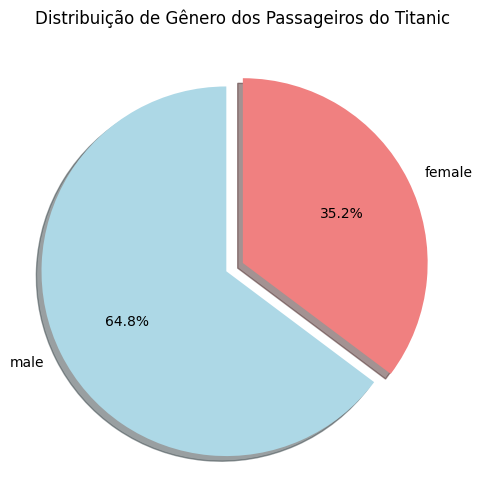

In [5]:
import matplotlib.pyplot as plt

# Distribuição de gênero dos passageiros
dist_genero = titanic['Sex'].value_counts()
print(dist_genero)

# Configuração do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(x=dist_genero.values, labels=dist_genero.index,
        autopct='%1.1f%%', shadow=True, startangle=90,
        explode=[0.1, 0], colors=['lightblue', 'lightcoral'])

# Adicione um título ao gráfico
plt.title('Distribuição de Gênero dos Passageiros do Titanic')

# Exibe o gráfico
plt.show()

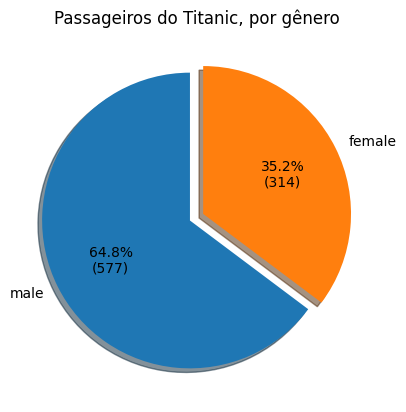

In [6]:
# Alternativa - Usando um prórpio código para formatação dos dados
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return f'{pct:.1f}%\n({val:d})'
  return my_format

plt.pie(dist_genero.values, labels=dist_genero.index,
        autopct=autopct_format(dist_genero.values),
        shadow=True, startangle=90,
        explode=[0.05]*len(dist_genero.values))
plt.title('Passageiros do Titanic, por gênero')
plt.show()

**b)** A distribuição dos sobreviventes.

Survived
0    549
1    342
Name: count, dtype: int64


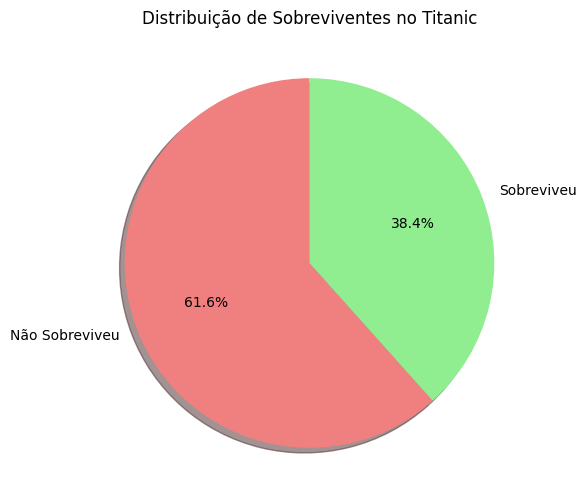

In [7]:
import matplotlib.pyplot as plt

# Distribuição de sobreviventes
dist_sob = titanic['Survived'].value_counts()
print(dist_sob)

# Configuração do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(dist_sob, labels=['Não Sobreviveu', 'Sobreviveu'],
        autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightcoral', 'lightgreen'])

# Adicione um título ao gráfico
plt.title('Distribuição de Sobreviventes no Titanic')

# Exibe o gráfico
plt.show()


In [ ]:
# Alternativa - Usando um prórpio código para formatação dos dados
plt.pie(dist_sob.values, labels=['Não', 'Sim'],
        autopct=autopct_format(dist_sob.values),
        shadow=True, startangle=90,
        explode=[0.05]*len(dist_sob.values))
plt.title('Passageiros do Titanic\n Sobrevivência ao naufrágio')
plt.show()

**c)** O número de sobreviventes em função:

* do gênero dos passageiros;
* da classe dos passageiros;
* do local de embarque dos passageiros.

Survived
0    549
1    342
Name: count, dtype: int64


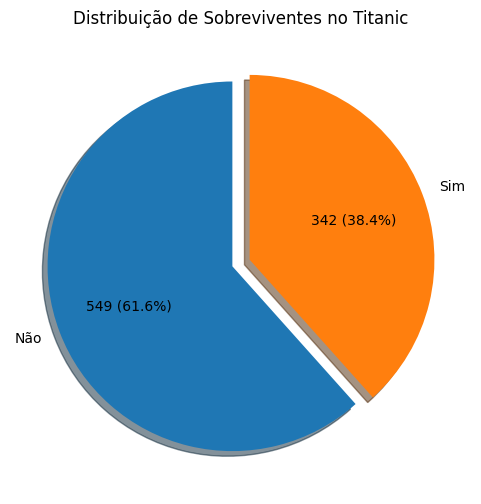

In [8]:
import matplotlib.pyplot as plt

# Função para formatar os valores no gráfico de pizza
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} ({pct:.1f}%)'
    return my_format

# Distribuição de sobreviventes
dist_sob = titanic['Survived'].value_counts()
print(dist_sob)

# Configuração do gráfico de pizza com formatação personalizada
plt.figure(figsize=(6, 6))
plt.pie(dist_sob.values, labels=['Não', 'Sim'],
        autopct=autopct_format(dist_sob.values),
        shadow=True, startangle=90,
        explode=[0.05]*len(dist_sob.values))

# Adicione um título ao gráfico
plt.title('Distribuição de Sobreviventes no Titanic')

# Exibe o gráfico
plt.show()


**d)** O número de sobreviventes em cada classe, por gênero.

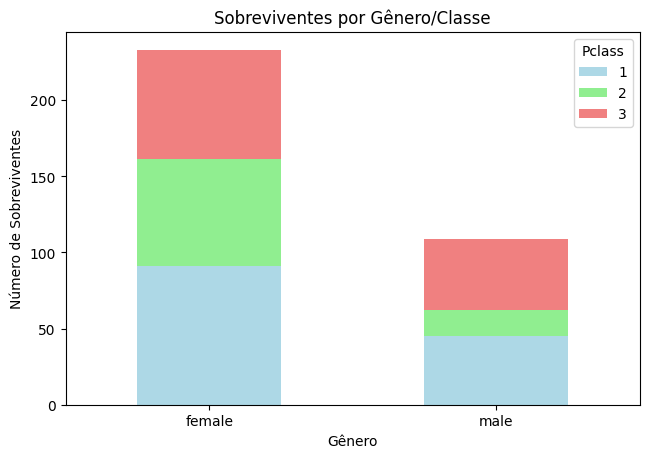

In [9]:
import matplotlib.pyplot as plt

# Agrupe os dados por gênero e classe e conte o número de sobreviventes em cada grupo
sobreviventes_por_genero_classe = titanic.groupby(['Sex', 'Pclass'])['Survived'].sum().unstack()

# Crie um gráfico de barras empilhadas
sobreviventes_por_genero_classe.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral'])

# Configurações do gráfico
plt.tight_layout()
plt.title('Sobreviventes por Gênero/Classe')
plt.ylabel('Número de Sobreviventes')
plt.xlabel('Gênero')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico
plt.show()


**e)** A distribuição de idade dos passageiros, em classes com amplitude de 5 anos.

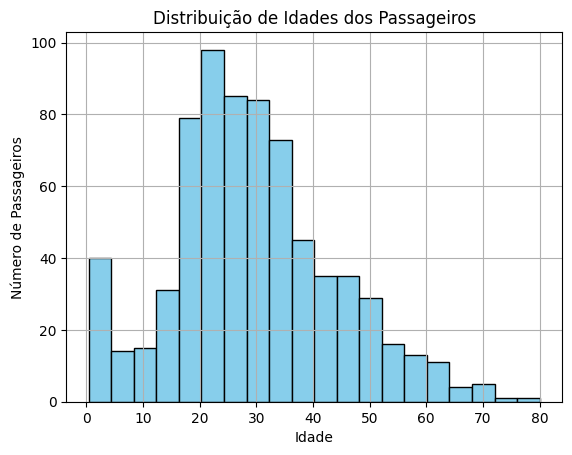

In [10]:
import matplotlib.pyplot as plt

# Crie um histograma da coluna 'Age'
plt.hist(titanic['Age'], bins=20, color='skyblue', edgecolor='black')

# Configurações do gráfico
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.grid(True)

# Exibe o gráfico
plt.show()


**f)** A distribuição de idades dos passageiros que não sobreviveram ao naufrágio.

In [ ]:
'Complete aqui!'

plt.title('Distribuição de idades dos passageiros\n mortos no naufrágio')
plt.xlabel('Idade')
plt.ylabel('Número de passageiros')
plt.show()

**g)** A distribuição de idades dos passageiros que sobreviveram ao naufrágio.

In [ ]:
'Complete aqui!'

plt.title('Distribuição de idades dos passageiros\n que sobreviveram ao naufrágio')
plt.xlabel('Idade')
plt.ylabel('Número de passageiros')
plt.show()

**h)** A distribuição de idades dos passageiros, identificando possíveis *oultiers*.

In [ ]:
# Descrição geral do conjunto de dados
'Complete aqui!'

In [ ]:
# Quartis da distribuição de idades
quartis = 'Complete aqui!'
display(quartis)

In [ ]:
# Calculando a amplitude interquartil
interquartil = 'Complete aqui!'
print(f'Amplitude interquartil: {interquartil} anos')

In [ ]:
# Limites para detecção de outliers
lim_min = 'Complete aqui!'
lim_max = 'Complete aqui!'
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')

In [ ]:
# Procurando por outliers
out_inf = 'Complete aqui!'
print('Outlier inferior:')
display(out_inf.sort_values(axis=0))

out_sup = 'Complete aqui!'
print('\nOutlier superior:')
display(out_sup.sort_values(axis=0))

In [ ]:
# Boxplot
'Complete aqui!'

plt.xlabel('Idade')
plt.show()

**i)** A distribuição de idades dos passageiros, por gênero, identificando possíveis *outliers*.

In [ ]:
# Boxplot
'Complete aqui!'

plt.suptitle('')
plt.xlabel('Idade')
plt.show()

**j)** A distribuição de idades dos passageiros que sobreviveram ou não ao naufrágio, identificando possíveis *outliers*.

In [ ]:
# Boxplot
'Complete aqui!'

plt.suptitle('')
plt.xlabel('Idade')
plt.show()

## Probabilidades

**a)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com o gênero, a classe e a idade (abaixo dos 30 anos) dos passageiros. Essa tabela reùne a contagem de sobreviventes em cada agrupamento.

In [ ]:
# Contagem de sobrevivência por 'Sex', 'Pclass' e 'Age_Fill' < 30
genero = 'Complete aqui!'
sobrevivencia = 'Complete aqui!'
classe = 'Complete aqui!'
jovem = 'Complete aqui!'

pd.crosstab('Complete aqui!')

**b)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a classe dos passageiros. A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* tenha sobrevivido, dado que pertencia à 2ª classe;
* pertença à 3ª classe, dado que não sobreviveu;
* pertença à 1ª classe e não tenha sobrevivido;
* tenha sobrevivido ou pertença à 3ª classe.


In [ ]:
# Tabela de distribuição conjunta
tab = 'Complete aqui!'
display(tab)

In [ ]:
# P(Sobreviveu | 2ª classe)
prob = 'Complete aqui!'
print(f'P(Sobreviveu | 2ª classe) = {prob*100:.1f}%')

In [ ]:
# P(3ª classe | Não sobreviveu)
prob = 'Complete aqui!'
print(f'P(3ª classe | Não sobreviveu) = {prob*100:.1f}%')

In [ ]:
# P(1ª classe E Não sobreviveu) = P(1ª classe) * P(Não Sobreviveu | 1ª classe)
prob1 = 'Complete aqui!'
prob2 = 'Complete aqui!'
print(f'P(1ª classe E Não sobreviveu) = {prob1*prob2*100:.1f}%')

In [ ]:
# P(Sobreviveu OU 3ª classe) = P(Sobreviveu) + P(3ª classe) - P(Sobreviveu E 3ª classe)
prob1 = 'Complete aqui!'
prob2 = 'Complete aqui!'

# P(Sobreviveu E 3ª classe) = P(Sobreviveu) * P(3ª classe | Sobreviveu)
prob3 = 'Complete aqui!'

print(f'P(Sobreviveu OU 3ª classe) = {(prob1+prob2-prob3)*100:.1f}%')

**c)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a idade inferior a 30 anos (jovem). A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é jovem;
* não seja jovem, dado que sobreviveu;
* seja jovem e não tenha sobrevivido;
* tenha sobrevivido ou não seja jovem.


In [ ]:
# Tabela de distribuição conjunta
tab = 'Complete aqui!'
display(tab)

**d)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com o gênero dos passageiros. A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é mulher;
* seja homem, dado que sobreviveu;
* seja mulher e tenha sobrevivido;
* tenha sobrevivido ou seja mulher.


In [ ]:
# Tabela de distribuição conjunta
tab = 'Complete aqui!'
display(tab)

**e)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a idade superior a 60 anos (idoso). A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é idoso;
* não seja idoso, dado que sobreviveu;
* seja idoso e não tenha sobrevivido;
* tenha sobrevivido ou não seja idoso.


In [ ]:
# Filtro de idade > 60 anos
idoso = 'Complete aqui!'
# Tabela de distribuição conjunta
tab = 'Complete aqui!'
display(tab)